In [29]:
import pandas as pd

# Load the data

In [30]:
data_path = 'input/data_from_kaggle.csv'
data = pd.read_csv(data_path)
data.head(), data.columns

(        Month  C++    C#  TypeScript  PHP  Swift  Ruby  Go  SQL  Kotlin  ...  \
 0  2008-09-01  755  1639           0  474      0   286   0  503       0  ...   
 1  2008-11-01  734  1729           0  499      0   157   0  413       0  ...   
 2  2008-12-01  630  1594           0  476      0   159   0  424       0  ...   
 3  2009-01-01  848  2374           0  628      1   205   0  585       0  ...   
 4  2009-02-01  841  2597           0  757      1   286   0  668       0  ...   
 
    Shell    C  HTML  Objective-C  Perl  Matlab  R  Python  Java  Javascript  
 0     65  320   328           50   130      11  6     537   634        1129  
 1     51  258   327          106    97      11  1     448   580         954  
 2     51  188   309          123   133      13  1     437   625         825  
 3     47  318   414          143   146      19  8     631   790        1147  
 4     75  331   480          209   163      27  8     630   945        1202  
 
 [5 rows x 21 columns],
 Index(['Mon

# Preprocessing

In [31]:
print(data.shape)
trimmed_data = data[2:].reset_index(drop=True)

total_months = trimmed_data.shape[0]
period_length_dynamic = total_months // 3
print(period_length_dynamic)

dynamic_periods = [trimmed_data.iloc[i * period_length_dynamic:(i + 1) * period_length_dynamic] for i in range(3)]

dynamic_python_data_periods = [period['Python'].reset_index(drop=True) for period in dynamic_periods]
dynamic_python_data_periods[0].head(), dynamic_python_data_periods[1].head(), dynamic_python_data_periods[2].head()

(185, 21)
61


(0    437
 1    631
 2    630
 3    764
 4    770
 Name: Python, dtype: int64,
 0     9818
 1     9876
 2    11397
 3    10716
 4     9210
 Name: Python, dtype: int64,
 0    17498
 1    19863
 2    19799
 3    18874
 4    17190
 Name: Python, dtype: int64)

In [32]:
def extract_data_with_dates(dataframe, period_length):
    periods_data = []
    date_ranges = []

    for i in range(3):
        start_idx = i * period_length
        end_idx = (i + 1) * period_length

        period_data = dataframe.iloc[start_idx:end_idx]

        start_date = period_data['Month'].iloc[0]
        end_date = period_data['Month'].iloc[-1]

        periods_data.append(period_data['Python'].reset_index(drop=True))
        date_ranges.append(f"from {start_date} to {end_date}")

    return periods_data, date_ranges


period_data_with_dates, period_date_ranges = extract_data_with_dates(trimmed_data, period_length_dynamic)
period_date_ranges

['from 2008-12-01 to 2013-12-01',
 'from 2014-01-01 to 2019-01-01',
 'from 2019-02-01 to 2024-02-01']

In [33]:
combined_python_data = pd.concat(dynamic_python_data_periods, axis=1)
combined_python_data.columns = ['Period 1', 'Period 2', 'Period 3']

output_path = 'output/data_after_pre_processing.csv'
combined_python_data.to_csv(output_path, index=False)
print('Data saved to', output_path)

Data saved to output/data_after_pre_processing.csv


# Ćwiczenie 2
Określ parametry rozkładu poszczególnych populacji: średnia, odchylenie standardowe, minimum, maksimum, mediana, pierwszy kwartyl i trzeci kwartyl

In [34]:
def calculate_descriptive_stats(input_data):
    stats = {
        'mean': input_data.mean(),
        'std_dev': input_data.std(),
        'min': input_data.min(),
        'max': input_data.max(),
        'median': input_data.median(),
        'first_quartile': input_data.quantile(0.25),
        'third_quartile': input_data.quantile(0.75)
    }
    return stats


descriptive_stats_periods = [calculate_descriptive_stats(period) for period in dynamic_python_data_periods]

stats_df = pd.DataFrame(descriptive_stats_periods, index=['Period 1', 'Period 2', 'Period 3'])
stats_df

,mean,std_dev,min,max,median,first_quartile,third_quartile
Period 1,3969.721311,2535.168062,437,9464,3510.0,1946.0,5741.0
Period 2,13504.639344,2910.959264,8754,18123,13089.0,11214.0,16212.0
Period 3,18327.934426,5025.331873,7028,29378,19399.0,16846.0,20843.0


In [35]:
print(combined_python_data)

    Period 1  Period 2  Period 3
0        437      9818     17498
1        631      9876     19863
2        630     11397     19799
3        764     10716     18874
4        770      9210     17190
..       ...       ...       ...
56      7933     16001      9031
57      7947     18123      8482
58      9462     17988      7028
59      9464     15704      8024
60      8432     16920      7793

[61 rows x 3 columns]


# Ćwiczenie 3
Sprawdź równość badanej  cechy  we  wszystkich  populacjach  odpowiednim  testem. Pamiętaj o sprawdzeniu czy zmienne są powiązane, równości wariancji, rozkładu badanej cechy. Jeśli jest potrzeba wykonaj odpowiednią analizępost-hoc.

In [36]:
from scipy.stats import shapiro, levene

levene_test = levene(combined_python_data['Period 1'], combined_python_data['Period 2'], combined_python_data['Period 3'])

shapiro_test1 = shapiro(combined_python_data['Period 1'])
shapiro_test2 = shapiro(combined_python_data['Period 2'])
shapiro_test3 = shapiro(combined_python_data['Period 3'])

alpha = 0.05

results = ""
results += "Test Levene'a na równość wariancji:\n"
results += f"Wartość statystyczna: {levene_test.statistic:.3f}, p-wartość: {levene_test.pvalue:.3f}\n"
results += "Interpretacja: "
results += "Nie ma wystarczających dowodów na różnice w wariancjach" if levene_test.pvalue > alpha else "Istnieją statystycznie istotne różnice w wariancjach"
results += "\n\n"

results += "Testy Shapiro-Wilka na normalność rozkładu:\n"
results += f"Okres 1: Statystyka = {shapiro_test1[0]:.3f}, p-wartość = {shapiro_test1[1]:.3f} - "
results += "rozkład jest normalny" if shapiro_test1[1] > alpha else "rozkład nie jest normalny"
results += "\n"
results += f"Okres 2: Statystyka = {shapiro_test2[0]:.3f}, p-wartość = {shapiro_test2[1]:.3f} - "
results += "rozkład jest normalny" if shapiro_test2[1] > alpha else "rozkład nie jest normalny"
results += "\n"
results += f"Okres 3: Statystyka = {shapiro_test3[0]:.3f}, p-wartość = {shapiro_test3[1]:.3f} - "
results += "rozkład jest normalny" if shapiro_test3[1] > alpha else "rozkład nie jest normalny"

print(results)
print('\nDane są niezależne od siebie, ponieważ dotyczą różnych okresów czasowych')

Test Levene'a na równość wariancji:
Wartość statystyczna: 6.226, p-wartość: 0.002
Interpretacja: Istnieją statystycznie istotne różnice w wariancjach

Testy Shapiro-Wilka na normalność rozkładu:
Okres 1: Statystyka = 0.934, p-wartość = 0.003 - rozkład nie jest normalny
Okres 2: Statystyka = 0.937, p-wartość = 0.004 - rozkład nie jest normalny
Okres 3: Statystyka = 0.930, p-wartość = 0.002 - rozkład nie jest normalny

Dane są niezależne od siebie, ponieważ dotyczą różnych okresów czasowych


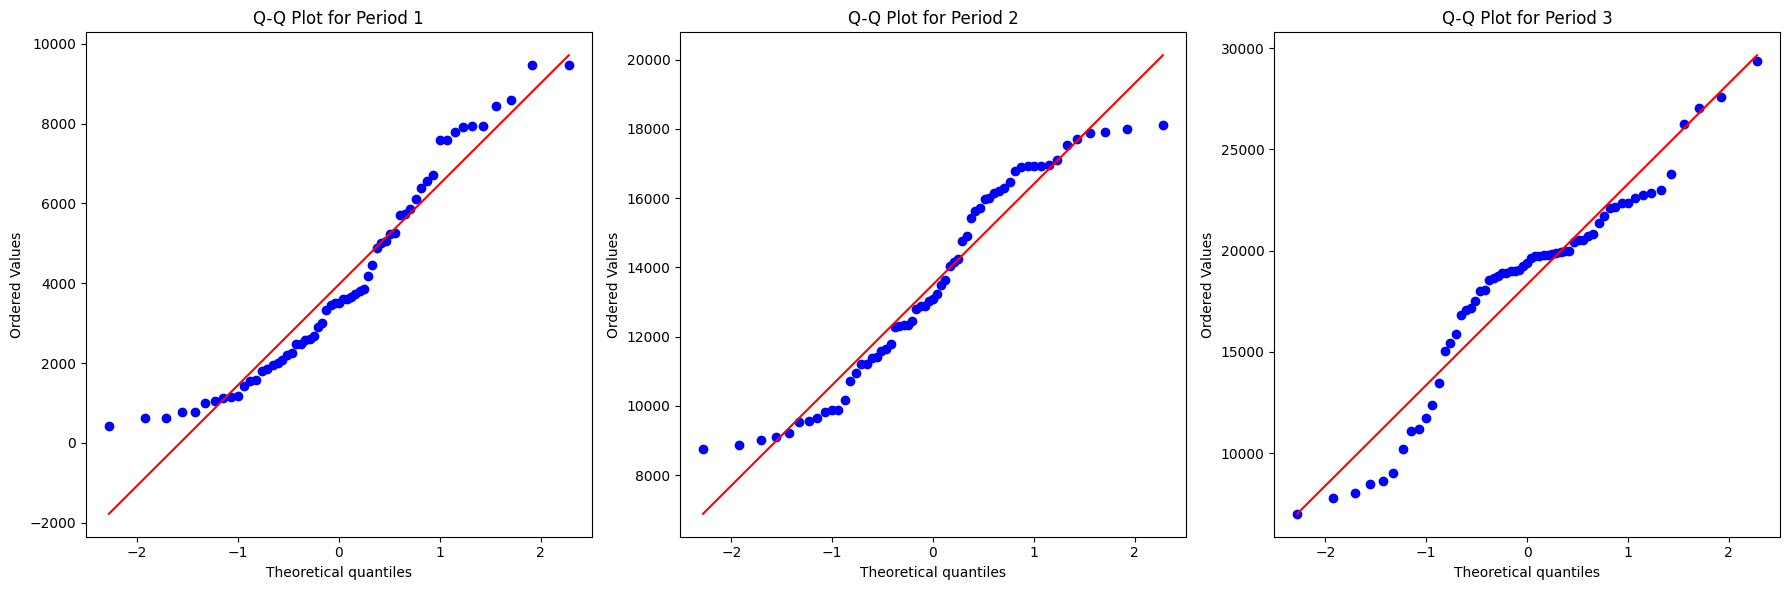

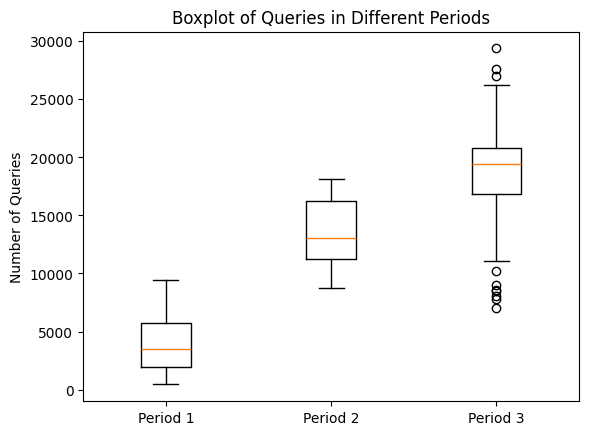

In [37]:
import matplotlib.pyplot as plt
import scipy.stats as stats


def qqplot(data_list, titles):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Setting up a 1x3 subplot
    for data, title, ax in zip(data_list, titles, axs):
        stats.probplot(data, dist="norm", plot=ax)
        ax.set_title(f'Q-Q Plot for {title}')
    plt.tight_layout()
    plt.show()


data_list = [combined_python_data['Period 1'], combined_python_data['Period 2'], combined_python_data['Period 3']]
titles = ['Period 1', 'Period 2', 'Period 3']

qqplot(data_list, titles)

fig, ax = plt.subplots()
ax.boxplot([combined_python_data['Period 1'], combined_python_data['Period 2'], combined_python_data['Period 3']],
           labels=['Period 1', 'Period 2', 'Period 3'])
ax.set_title('Boxplot of Queries in Different Periods')
ax.set_ylabel('Number of Queries')
plt.show()

Q-Q Plots
Na wykresach (Q-Q) dla każdego z okresów widać, że punkty danych znacząco odbiegają od prostej, co jest charakterystyczne dla rozkładów niebędących normalnymi. To potwierdza wyniki testu Shapiro-Wilka, które wskazywały na brak normalności rozkładu w każdym z okresów.

Boxploty
Boxploty prezentują rozkład ilości zapytań w poszczególnych okresach. Zauważalne są różnice w medianach oraz obecność wartości odstających, szczególnie w pierwszym okresie. Wartości te mogą wpływać na wyniki testów statystycznych i sugerują zróżnicowanie ilości zapytań między poszczególnymi okresami. Dodatkowo okres trzeci ma dużo outlinerów

In [38]:
from scipy.stats import kruskal

kruskal_test = kruskal(combined_python_data['Period 1'], combined_python_data['Period 2'], combined_python_data['Period 3'])

# Results string to summarize the Kruskal-Wallis test
kruskal_results = "Test Kruskala-Wallisa na równość median:\n"
kruskal_results += f"Wartość statystyczna: {kruskal_test.statistic:.3f}, p-wartość: {kruskal_test.pvalue:.3f}\n"
kruskal_results += "Interpretacja: "
kruskal_results += "Nie ma wystarczających dowodów na różnice w medianach" if kruskal_test.pvalue > alpha else "Istnieją statystycznie istotne różnice w medianach"

print(kruskal_results)

Test Kruskala-Wallisa na równość median:
Wartość statystyczna: 134.203, p-wartość: 0.000
Interpretacja: Istnieją statystycznie istotne różnice w medianach


In [39]:
from scipy.stats import mannwhitneyu


def mann_whitney_test(data1, data2, label1, label2):
    stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    result = f"Test Manna-Whitneya pomiędzy {label1} a {label2}:\n"
    result += f"Statystyka U = {stat}, P-wartość = {p}\n"
    result += "Interpretacja: "
    result += "Brak statystycznie istotnych różnic" if p > alpha else "Statystycznie istotne różnice"
    return result


period1_data = combined_python_data['Period 1']
period2_data = combined_python_data['Period 2']
period3_data = combined_python_data['Period 3']

results_p1_p2 = mann_whitney_test(period1_data, period2_data, "Okres 1", "Okres 2")
results_p1_p3 = mann_whitney_test(period1_data, period3_data, "Okres 1", "Okres 3")
results_p2_p3 = mann_whitney_test(period2_data, period3_data, "Okres 2", "Okres 3")

print(results_p1_p2)
print(results_p1_p3)
print(results_p2_p3)

Test Manna-Whitneya pomiędzy Okres 1 a Okres 2:
Statystyka U = 10.0, P-wartość = 2.7235034407605115e-21
Interpretacja: Statystycznie istotne różnice
Test Manna-Whitneya pomiędzy Okres 1 a Okres 3:
Statystyka U = 28.0, P-wartość = 6.555692432845869e-21
Interpretacja: Statystycznie istotne różnice
Test Manna-Whitneya pomiędzy Okres 2 a Okres 3:
Statystyka U = 706.0, P-wartość = 3.4418924958178277e-09
Interpretacja: Statystycznie istotne różnice


In [40]:
data_after_pre_processing = pd.read_csv('output/data_after_pre_processing.csv')
data_summary = {
    'mean': data_after_pre_processing.mean().to_string(),  # Średnie dla każdej kolumny
    'median': data_after_pre_processing.median().to_string()  # Mediany dla każdej kolumny
}

results_mm = "Średnie wartości dla każdej kolumny:\n"
results_mm += data_summary['mean']
results_mm += "\n\nMediany dla każdej kolumny:\n"
results_mm += data_summary['median']

print(results_mm)

Średnie wartości dla każdej kolumny:
Period 1     3969.721311
Period 2    13504.639344
Period 3    18327.934426

Mediany dla każdej kolumny:
Period 1     3510.0
Period 2    13089.0
Period 3    19399.0


In [41]:
from scipy.stats import wilcoxon

mean_plus_10_percent = data_after_pre_processing.mean() * 1.10
median_plus_10_percent = data_after_pre_processing.median() * 1.10


def perform_one_sided_wilcoxon_test(data, threshold):
    result = wilcoxon(data - threshold, alternative='less')  # 'less' dla testowania czy dane < threshold
    stat_w, p_value_w = result.statistic, result.pvalue
    return stat_w, p_value_w


wilcoxon_test_results_median = {col: perform_one_sided_wilcoxon_test(data_after_pre_processing[col], median_plus_10_percent[col]) for col in data_after_pre_processing.columns}
wilcoxon_test_results_mean = {col: perform_one_sided_wilcoxon_test(data_after_pre_processing[col], mean_plus_10_percent[col]) for col in data_after_pre_processing.columns}

results = ""
results += "Testy Wilcoxona dla średnich:\n"
for period, (stat, p_value) in wilcoxon_test_results_mean.items():
    results += f"{period}: Statystyka = {stat:.3f}, p-wartość = {p_value:.5f} - "
    results += "średnia jest mniejsza niż średnia +10%" if p_value < alpha else "brak wystarczających dowodów na mniejszą średnią niż średnia +10%"
    results += "\n"

results += "\nTesty Wilcoxona dla median:\n"
for period, (stat, p_value) in wilcoxon_test_results_median.items():
    results += f"{period}: Statystyka = {stat:.3f}, p-wartość = {p_value:.5f} - "
    results += "mediana jest mniejsza niż mediana +10%" if p_value < alpha else "brak wystarczających dowodów na mniejszą medianę niż mediana +10%"
    results += "\n"

print(results)


Testy Wilcoxona dla średnich:
Period 1: Statystyka = 757.000, p-wartość = 0.08788 - brak wystarczających dowodów na mniejszą średnią niż średnia +10%
Period 2: Statystyka = 500.000, p-wartość = 0.00069 - średnia jest mniejsza niż średnia +10%
Period 3: Statystyka = 603.000, p-wartość = 0.00694 - średnia jest mniejsza niż średnia +10%

Testy Wilcoxona dla median:
Period 1: Statystyka = 930.000, p-wartość = 0.45568 - brak wystarczających dowodów na mniejszą medianę niż mediana +10%
Period 2: Statystyka = 644.000, p-wartość = 0.01517 - mediana jest mniejsza niż mediana +10%
Period 3: Statystyka = 322.000, p-wartość = 0.00000 - mediana jest mniejsza niż mediana +10%



In [54]:
import numpy as np
from sklearn.utils import resample

# Przygotowanie danych z poprzednio wczytanego DataFrame
data_alpha = data_after_pre_processing


def bootstrap_confidence_interval(data, n_iterations=1000, ci=95):
    boot_means = []
    boot_vars = []
    for _ in range(n_iterations):
        boot_sample = resample(data)
        boot_means.append(np.mean(boot_sample))
        boot_vars.append(np.var(boot_sample, ddof=1))

    alpha = 100 - ci
    lower_mean = np.percentile(boot_means, alpha/2)
    upper_mean = np.percentile(boot_means, 100-alpha/2)
    lower_var = np.percentile(boot_vars, alpha/2)
    upper_var = np.percentile(boot_vars, 100-alpha/2)

    return (lower_mean, upper_mean), (lower_var, upper_var)
ci_results = {}
for column in data_alpha.columns:
    ci_95_mean, ci_95_var = bootstrap_confidence_interval(data_alpha[column], ci=95)
    ci_99_mean, ci_99_var = bootstrap_confidence_interval(data_alpha[column], ci=99)
    ci_results[column] = {
        '95% CI Mean': ci_95_mean,
        '95% CI Variance': ci_95_var,
        '99% CI Mean': ci_99_mean,
        '99% CI Variance': ci_99_var
    }

ci_results_output = ""
for period, intervals in ci_results.items():
    ci_results_output += f"{period}:\n"
    ci_results_output += f"  95% przedział ufności dla średniej: {intervals['95% CI Mean'][0]:.4f} do {intervals['95% CI Mean'][1]:.4f}\n"
    ci_results_output += f"  95% przedział ufności dla wariancji: {intervals['95% CI Variance'][0]:.4f} do {intervals['95% CI Variance'][1]:.4f}\n"
    ci_results_output += f"  99% przedział ufności dla średniej: {intervals['99% CI Mean'][0]:.4f} do {intervals['99% CI Mean'][1]:.4f}\n"
    ci_results_output += f"  99% przedział ufności dla wariancji: {intervals['99% CI Variance'][0]:.4f} do {intervals['99% CI Variance'][1]:.4f}\n"
    ci_results_output += "\n"

print(ci_results_output)

Period 1:
  95% przedział ufności dla średniej: 3394.5328 do 4612.9299
  95% przedział ufności dla wariancji: 4643434.2031 do 8126022.9028
  99% przedział ufności dla średniej: 3169.9778 do 4810.8032
  99% przedział ufności dla wariancji: 4153811.5585 do 8782683.0132

Period 2:
  95% przedział ufności dla średniej: 12822.6783 do 14213.8344
  95% przedział ufności dla wariancji: 6540012.4552 do 10169224.1626
  99% przedział ufności dla średniej: 12621.7011 do 14452.9939
  99% przedział ufności dla wariancji: 5970928.6138 do 10635483.4147

Period 3:
  95% przedział ufności dla średniej: 17011.7459 do 19550.1439
  95% przedział ufności dla wariancji: 15935492.2064 do 33861917.2600
  99% przedział ufności dla średniej: 16514.0929 do 19842.4713
  99% przedział ufności dla wariancji: 13873220.6344 do 36869598.7100


